In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6fb30e146ce48978787ba4314537e78c


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
lat_lngs

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

584

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | mandera
Processing Record 3 of Set 1 | itarema
Processing Record 4 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 5 of Set 1 | aksarka
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | vila franca do campo
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | houlton
Processing Record 10 of Set 1 | beohari
Processing Record 11 of Set 1 | codrington
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | bonthe
Processing Record 15 of Set 1 | port blair
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | paso de los toros
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | longyearbyen

Processing Record 38 of Set 4 | auki
Processing Record 39 of Set 4 | nieuw amsterdam
Processing Record 40 of Set 4 | baykit
Processing Record 41 of Set 4 | las palmas
Processing Record 42 of Set 4 | wulanhaote
City not found. Skipping...
Processing Record 43 of Set 4 | boa vista
Processing Record 44 of Set 4 | lapy
Processing Record 45 of Set 4 | kerki
City not found. Skipping...
Processing Record 46 of Set 4 | hakvik
City not found. Skipping...
Processing Record 47 of Set 4 | cabras
Processing Record 48 of Set 4 | sisimiut
Processing Record 49 of Set 4 | kuito
Processing Record 50 of Set 4 | praya
Processing Record 1 of Set 5 | bahar
Processing Record 2 of Set 5 | souillac
Processing Record 3 of Set 5 | roma
Processing Record 4 of Set 5 | novaya usman
Processing Record 5 of Set 5 | sept-iles
Processing Record 6 of Set 5 | los llanos de aridane
Processing Record 7 of Set 5 | northam
Processing Record 8 of Set 5 | saleaula
City not found. Skipping...
Processing Record 9 of Set 5 | kloul

Processing Record 30 of Set 8 | san patricio
Processing Record 31 of Set 8 | rivas
Processing Record 32 of Set 8 | felanitx
Processing Record 33 of Set 8 | poum
Processing Record 34 of Set 8 | laguna
Processing Record 35 of Set 8 | zeya
Processing Record 36 of Set 8 | nueva gerona
Processing Record 37 of Set 8 | zenzeli
Processing Record 38 of Set 8 | lebrija
Processing Record 39 of Set 8 | tabas
Processing Record 40 of Set 8 | kamenka
Processing Record 41 of Set 8 | bredasdorp
Processing Record 42 of Set 8 | santa rosalia
Processing Record 43 of Set 8 | fort nelson
Processing Record 44 of Set 8 | rajsamand
Processing Record 45 of Set 8 | techiman
Processing Record 46 of Set 8 | tynset
Processing Record 47 of Set 8 | cabo san lucas
Processing Record 48 of Set 8 | saint anthony
Processing Record 49 of Set 8 | layou
Processing Record 50 of Set 8 | chekalin
Processing Record 1 of Set 9 | ajdabiya
Processing Record 2 of Set 9 | bolungarvik
City not found. Skipping...
Processing Record 3 of

Processing Record 21 of Set 12 | tomatlan
Processing Record 22 of Set 12 | vallenar
Processing Record 23 of Set 12 | uruzgan
Processing Record 24 of Set 12 | barcelos
Processing Record 25 of Set 12 | vanersborg
Processing Record 26 of Set 12 | avera
Processing Record 27 of Set 12 | umarga
Processing Record 28 of Set 12 | rezekne
Processing Record 29 of Set 12 | melfort
Processing Record 30 of Set 12 | muisne
Processing Record 31 of Set 12 | birjand
Processing Record 32 of Set 12 | show low
Processing Record 33 of Set 12 | sturgeon bay
Processing Record 34 of Set 12 | malakal
-----------------------------
Data Retrieval Complete      
-----------------------------


In [8]:
len(city_data)

543

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,74.79,75,75,11.77,PF,2020-10-29 19:54:47
1,Mandera,3.94,41.87,82.35,62,25,11.10,KE,2020-10-29 19:57:59
2,Itarema,-2.92,-39.92,81.59,68,2,19.24,BR,2020-10-29 19:57:59
3,Aksarka,66.56,67.80,14.90,97,79,6.42,RU,2020-10-29 19:57:59
4,East London,-33.02,27.91,63.16,87,100,19.08,ZA,2020-10-29 19:57:59
5,Vila Franca Do Campo,37.72,-25.43,69.80,94,40,14.99,PT,2020-10-29 19:57:59
6,Mataura,-46.19,168.86,55.00,90,100,1.99,NZ,2020-10-29 19:57:59
7,Houlton,46.13,-67.84,42.80,52,90,9.17,US,2020-10-29 19:57:59
8,Beohari,24.05,81.38,65.01,43,0,1.72,IN,2020-10-29 19:58:00
9,Codrington,-38.27,141.97,50.85,93,97,2.06,AU,2020-10-29 19:58:00


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2020-10-29 19:54:47,-23.12,-134.97,74.79,75,75,11.77
1,Mandera,KE,2020-10-29 19:57:59,3.94,41.87,82.35,62,25,11.10
2,Itarema,BR,2020-10-29 19:57:59,-2.92,-39.92,81.59,68,2,19.24
3,Aksarka,RU,2020-10-29 19:57:59,66.56,67.80,14.90,97,79,6.42
4,East London,ZA,2020-10-29 19:57:59,-33.02,27.91,63.16,87,100,19.08
5,Vila Franca Do Campo,PT,2020-10-29 19:57:59,37.72,-25.43,69.80,94,40,14.99
6,Mataura,NZ,2020-10-29 19:57:59,-46.19,168.86,55.00,90,100,1.99
7,Houlton,US,2020-10-29 19:57:59,46.13,-67.84,42.80,52,90,9.17
8,Beohari,IN,2020-10-29 19:58:00,24.05,81.38,65.01,43,0,1.72
9,Codrington,AU,2020-10-29 19:58:00,-38.27,141.97,50.85,93,97,2.06


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time

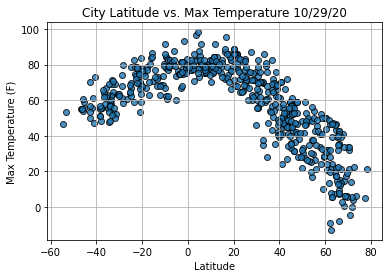

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

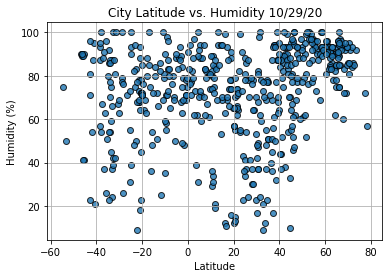

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

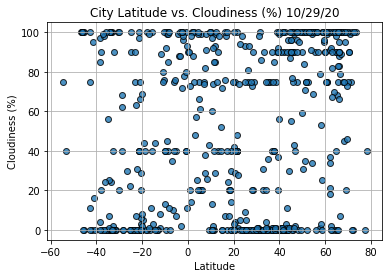

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

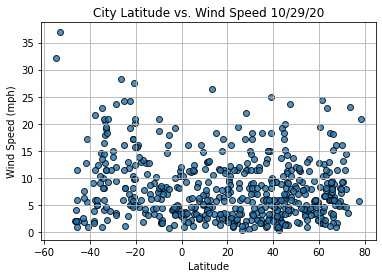

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                   Port Blair
Country                        IN
Date          2020-10-29 19:58:00
Lat                         11.67
Lng                         92.75
Max Temp                     80.4
Humidity                       84
Cloudiness                     99
Wind Speed                   9.15
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4      False
       ...  
538     True
539     True
540     True
541     True
542     True
Name: Lat, Length: 543, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2020-10-29 19:54:47,-23.12,-134.97,74.79,75,75,11.77
1,Mandera,KE,2020-10-29 19:57:59,3.94,41.87,82.35,62,25,11.10
2,Itarema,BR,2020-10-29 19:57:59,-2.92,-39.92,81.59,68,2,19.24
3,Aksarka,RU,2020-10-29 19:57:59,66.56,67.80,14.90,97,79,6.42
4,East London,ZA,2020-10-29 19:57:59,-33.02,27.91,63.16,87,100,19.08


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

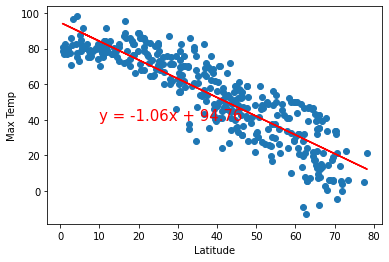

In [23]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))


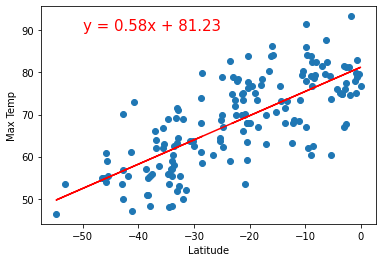

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))



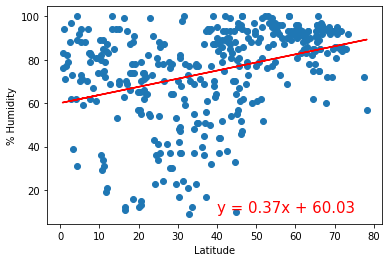

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))


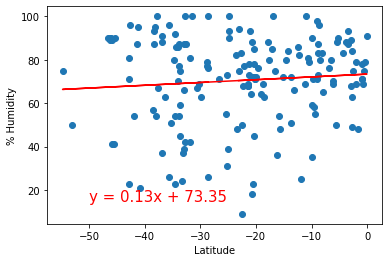

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

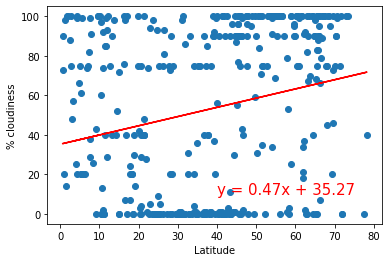

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % cloudiness', '% cloudiness',(40,10))


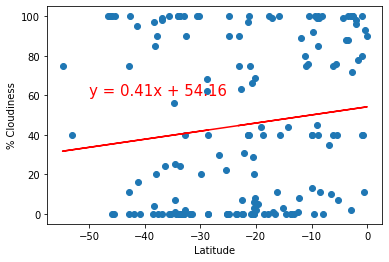

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

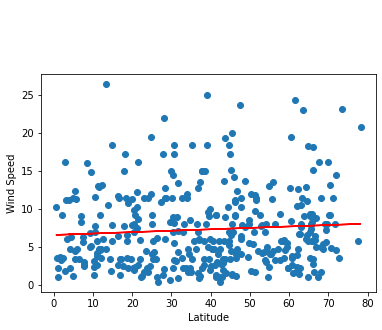

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

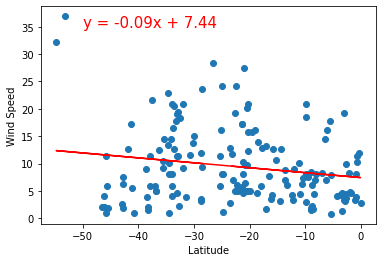

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))